Iteration 0 - Global Best Score: 0.8710653791956932
Iteration 100 - Global Best Score: 4.761390056140195e-06
Iteration 200 - Global Best Score: 9.015118034415335e-08
Iteration 300 - Global Best Score: 5.7177989690918387e-11
Iteration 400 - Global Best Score: 9.994125702246387e-16
Iteration 500 - Global Best Score: 5.292063255633844e-18
Iteration 600 - Global Best Score: 4.6057258643189716e-21
Iteration 700 - Global Best Score: 1.968198590803175e-25
Iteration 800 - Global Best Score: 7.410978426002084e-28
Iteration 900 - Global Best Score: 1.9721522630525295e-31

Optimization complete!
Best solution found: [1. 1.]
Best function value: 0.0


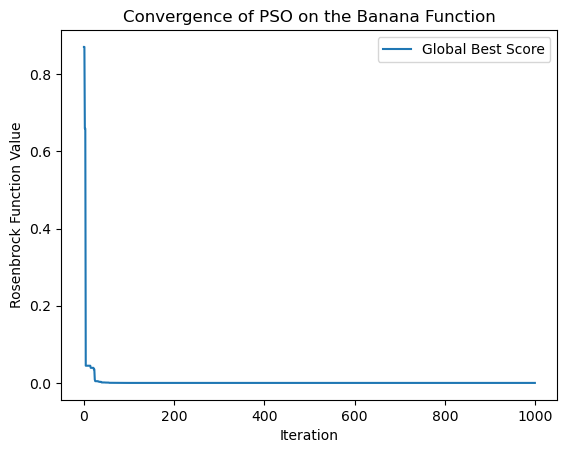

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the banana (Rosenbrock) function
def rosenbrock(position):
    x, y = position
    return (1 - x)**2 + 100 * (y - x**2)**2

# PSO parameters
num_particles = 30
dimensions = 2
max_iter = 1000

# Search space boundaries: you may adjust these as needed
bounds = np.array([[-2, 2], [-1, 3]])

# PSO hyperparameters
w = 0.7   # inertia weight
c1 = 1.5  # cognitive (particle) weight
c2 = 1.5  # social (swarm) weight

# Initialize particle positions and velocities randomly within bounds
positions = np.random.uniform(bounds[:,0], bounds[:,1], (num_particles, dimensions))
velocities = np.random.uniform(-1, 1, (num_particles, dimensions))

# Initialize personal best positions and their scores
pbest_positions = positions.copy()
pbest_scores = np.array([rosenbrock(pos) for pos in positions])

# Initialize global best
gbest_index = np.argmin(pbest_scores)
gbest_position = pbest_positions[gbest_index].copy()
gbest_score = pbest_scores[gbest_index]

# To record the convergence
gbest_scores = []

# PSO main loop
for iteration in range(max_iter):
    for i in range(num_particles):
        # Update velocity
        r1 = np.random.rand(dimensions)
        r2 = np.random.rand(dimensions)
        cognitive = c1 * r1 * (pbest_positions[i] - positions[i])
        social = c2 * r2 * (gbest_position - positions[i])
        velocities[i] = w * velocities[i] + cognitive + social
        
        # Update position and ensure particle is within bounds
        positions[i] = positions[i] + velocities[i]
        positions[i] = np.clip(positions[i], bounds[:,0], bounds[:,1])
        
        # Evaluate new position
        score = rosenbrock(positions[i])
        
        # Update personal best if current position is better
        if score < pbest_scores[i]:
            pbest_positions[i] = positions[i].copy()
            pbest_scores[i] = score
            
            # Update global best if needed
            if score < gbest_score:
                gbest_position = positions[i].copy()
                gbest_score = score

    gbest_scores.append(gbest_score)

    # (Optional) print progress every 100 iterations
    if iteration % 100 == 0:
        print(f"Iteration {iteration} - Global Best Score: {gbest_score}")

print("\nOptimization complete!")
print("Best solution found:", gbest_position)
print("Best function value:", gbest_score)

# Plot convergence history
plt.plot(gbest_scores, label='Global Best Score')
plt.xlabel('Iteration')
plt.ylabel('Rosenbrock Function Value')
plt.title('Convergence of PSO on the Banana Function')
plt.legend()
plt.show()
